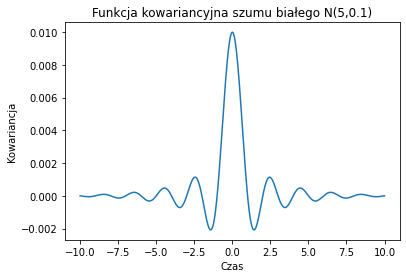

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry rozkładu Gaussowskiego
mean = 5
std_dev = 0.1

# Generowanie próbek czasu
time = np.linspace(-10, 10, num=1000)

# Obliczanie funkcji kowariancyjnej
covariance = std_dev ** 2 * np.sinc(time) * np.exp(-time ** 2 / (2 * mean ** 2))

# Wykres funkcji kowariancyjnej
plt.plot(time, covariance)
plt.title('Funkcja kowariancyjna szumu białego N(5,0.1)')
plt.xlabel('Czas')
plt.ylabel('Kowariancja')
plt.show()


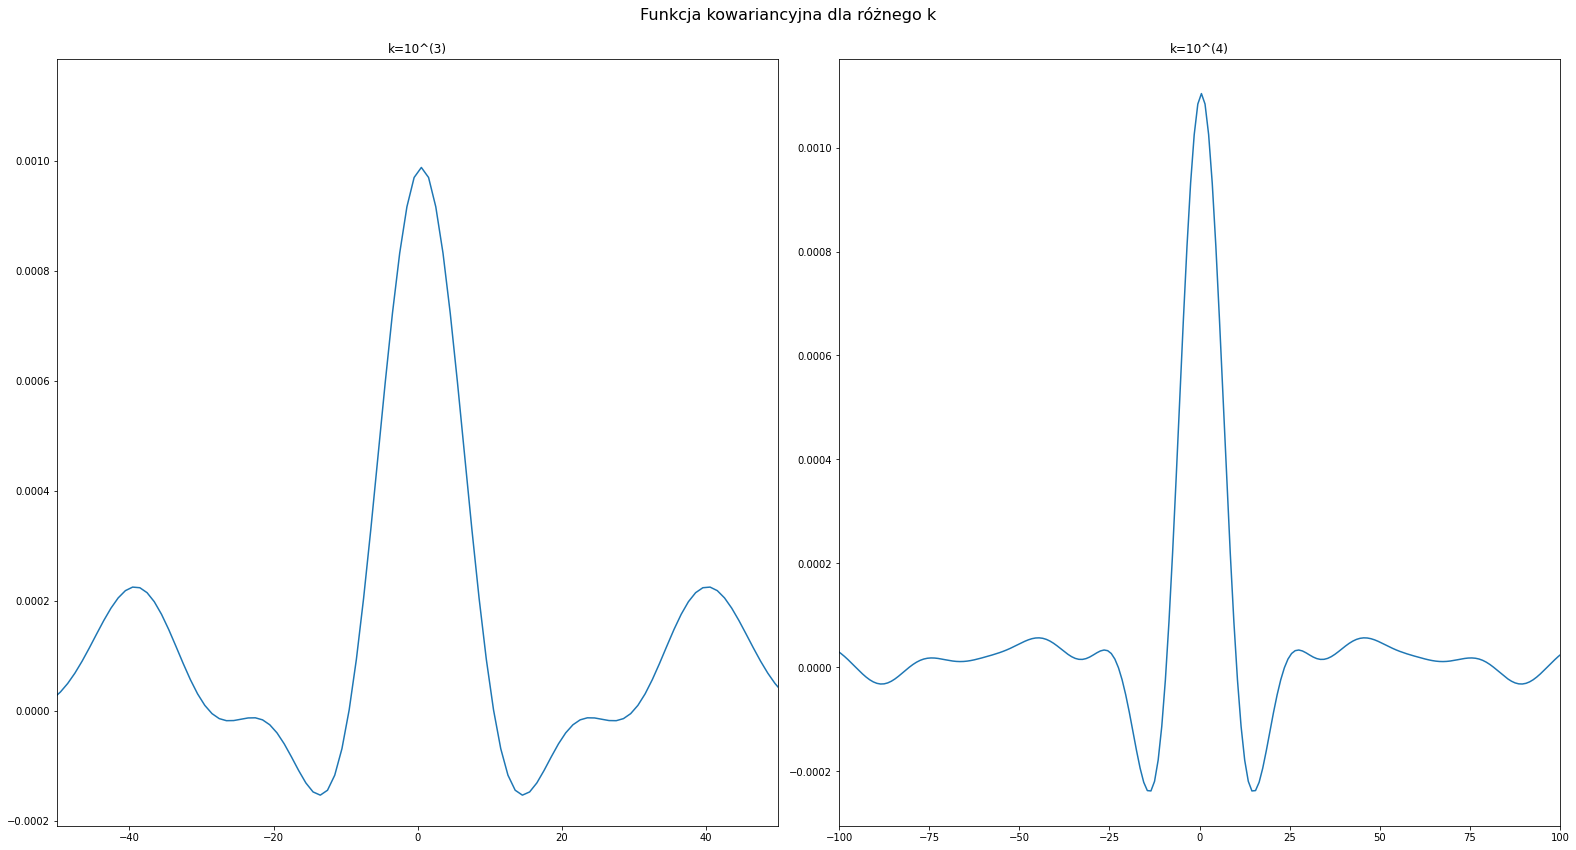

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def covariance(samples, k):
    substitute_mu_value = samples - mu
    cov = np.fft.fftshift(np.fft.ifft(np.abs(np.fft.fft(substitute_mu_value))**2 / k))
    cov = np.real(cov)
    return cov

mu = 5
sigma = 0.1

k_3 = pow(10, 3)
k_4 = pow(10, 4)

samples_k_3 = np.random.normal(mu, sigma, size=k_3)
samples_k_4 = np.random.normal(mu, sigma, size=k_4)

fig, axarr = plt.subplots(1, 2)
fig.set_figheight(12)
fig.set_figwidth(22)
fig.suptitle("Funkcja kowariancyjna dla różnego k", fontsize=16)

cov_k_3 = covariance(samples_k_3, k_3)
cov_k_4 = covariance(samples_k_4, k_4)

# Wygładzanie funkcji kowariancji za pomocą filtru dolnoprzepustowego Butterworth
order = 5  # Stopień filtru
cutoff_freq = 0.1  # Częstotliwość odcięcia
b, a = butter(order, cutoff_freq, btype='low', analog=False)

cov_k_3_smooth = filtfilt(b, a, cov_k_3)
cov_k_4_smooth = filtfilt(b, a, cov_k_4)

x_k_3 = np.linspace(-k_3//2, k_3//2, len(cov_k_3))
x_k_4 = np.linspace(-k_4//2, k_4//2, len(cov_k_4))

axarr[0].plot(x_k_3, cov_k_3_smooth)
axarr[0].set_title('k=10^(3)')
axarr[0].set_xlim(-k_3//20, k_3//20)
axarr[0].set_ylim(np.min(cov_k_3_smooth), np.max(cov_k_3_smooth))

axarr[1].plot(x_k_4, cov_k_4_smooth)
axarr[1].set_title('k=10^(4)')
axarr[1].set_xlim(-k_4//20, k_4//20)
axarr[1].set_ylim(np.min(cov_k_4_smooth), np.max(cov_k_4_smooth))

fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()


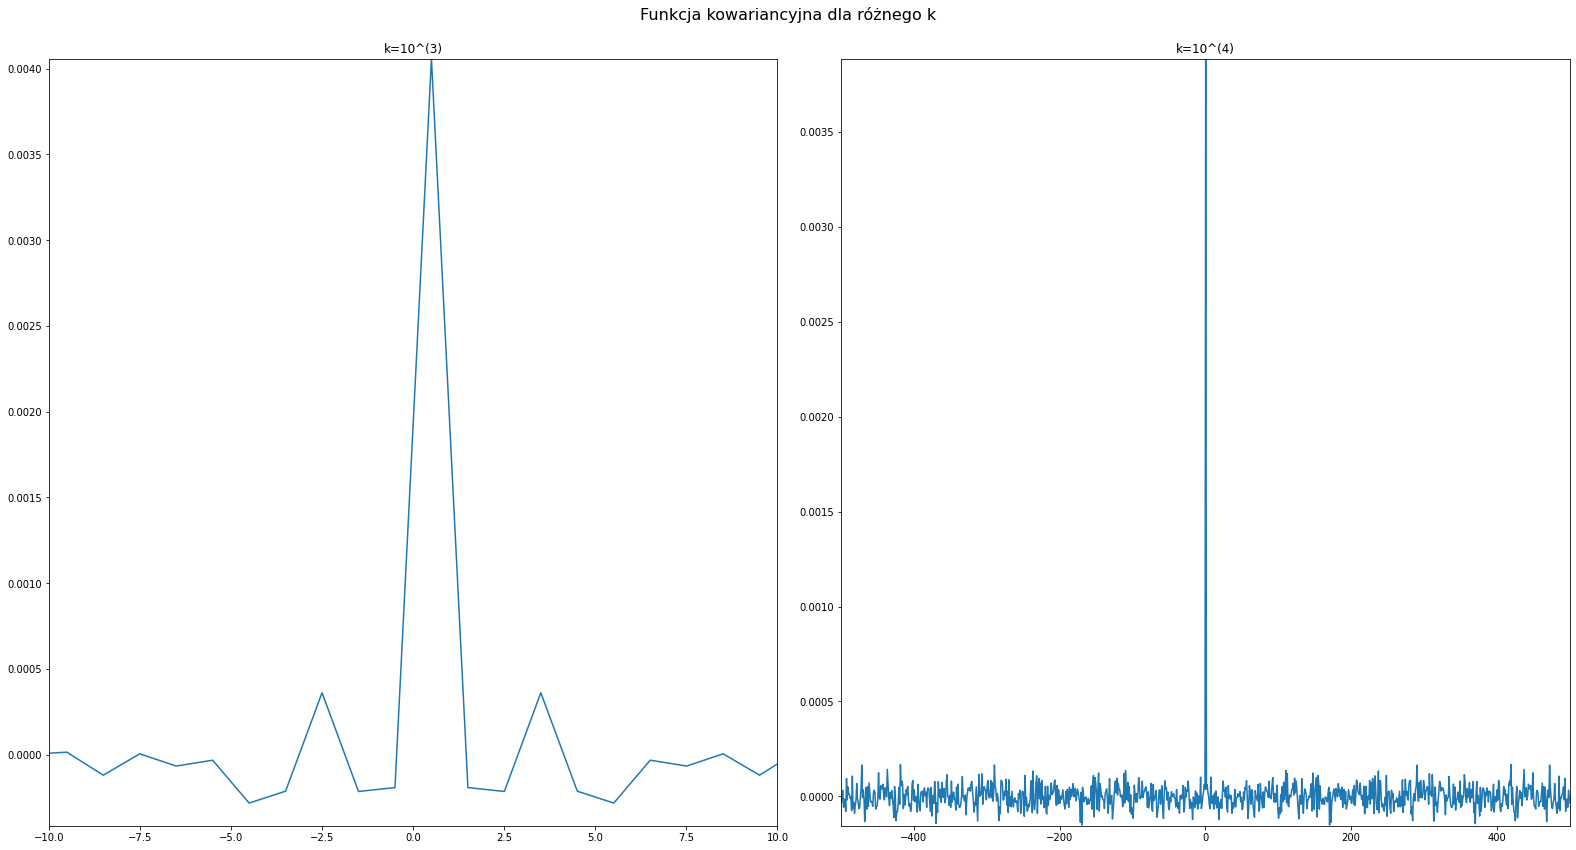

In [ ]:
# def covariance(samples, k):
#     # Subtitute DC component noise signal from samples
#     subtitute_mu_value = samples - mu
#     # Compute covariance function
#     cov = np.correlate(subtitute_mu_value, subtitute_mu_value, mode='full') / k
#     return cov